# FLIGHT PRICE PREDICTION
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.


## WebScrapping

In [1]:
!pip install selenium

## Importing the Libraries

In [2]:
import pandas as pd
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

## Scrapping Data for Flight

In [3]:
driver=webdriver.Chrome("chromedriver.exe") 

In [4]:
# creating empty list
flight=[]
city=[]
arrival=[]
departure=[]
duration=[]
stops=[]
price=[]


In [6]:
# scrapping detail
start=0
end=25
for page in range(start,end):
    flights=driver.find_elements_by_xpath("//span[@class='i-b text ellipsis']")
    for i in flights:
        try:
            flight.append(i.text)
        except NoSuchElementException:
            flight.append("-")
            
            
   
            
    dep=driver.find_elements_by_xpath("//div[@class='fs-15 bold time']")
    for i in dep:
        try:
            departure.append(i.text)
        except NoSuchElementException:
            departure.appned("--")
            
            
    
    arrv=driver.find_elements_by_xpath("//p[@class='bold fs-15 mb-2 pr time']")
    for i in arrv:
        try:
            arrival.append(i.text)
        except NoSuchElementException:
            arrival.append("--")
            
            
   
            
    dur=driver.find_elements_by_xpath("//p[@class='fs-12 bold du mb-2']")
    for i in dur:
        try:
            duration.append(i.text)
        except NoSuchElementException:
            duration.append('--')
            
            
            
    prc=driver.find_elements_by_xpath("//div[@class='i-b tipsy fare-summary-tooltip fs-18']")
    for i in prc:
        try:
            price.append(i.text)
        except NoSuchElementException:
            price.append("--")
            
    stp=driver.find_elements_by_xpath("//span[@class='dotted-borderbtm']")
    for i in stp:
        try:
            stops.append(i.text)
        except NoSuchElementException:
            stops.append("--")
        
        
            

In [22]:
start=0
end=25
for page in range(start,end):
    ct=driver.find_elements_by_xpath("//p[@title='New Delhi']")
    for i in ct:
        try:
            city.append(i.text)
        except NoSuchElementException:
            city.append("-")

In [25]:
start=0
end=25
destinations=[]
for page in range(start,end):
    dest=driver.find_elements_by_xpath("//p[@title='Mumbai']")
    for i in dest:
        try:
            destinations.append(i.text)
        except NoSuchElementException:
            destinations.append("-")

In [28]:
# creating dataframe
df=pd.DataFrame({})
df['Flight']=flight[:2100]
df['Boarding City']=city[:2100]
df['Destination']=destination[:2100]
df['Departure']=departure[:2100]
df['Arrival']=arrival[:2100]
df['duration']=duration[:2100]
df['Stops']=stops[:2100]
df['Price']=price[:2100]

In [30]:
df

,Flight,Boarding City,Destination,Departure,Arrival,duration,Stops,Price
0,Air Asia,New Delhi,New Delhi,18:40,06:20\n+ 1 day,11h 40m,1 Stop,"5,953"
1,Go First,New Delhi,Mumbai,18:50,20:45,1h 55m,1 Stop,"5,954"
2,Go First,New Delhi,New Delhi,09:05,11:05,2h 00m,1 Stop,"5,954"
3,Go First,New Delhi,Mumbai,06:15,08:20,2h 05m,1 Stop,"5,954"
4,Go First,New Delhi,New Delhi,14:20,16:25,2h 05m,1 Stop,"5,954"
...,...,...,...,...,...,...,...,...
2095,Air India,New Delhi,Mumbai,20:10,20:00\n+ 1 day,23h 50m,,"9,000"
2096,Vistara,New Delhi,New Delhi,17:10,15:00\n+ 1 day,21h 50m,,"9,210"
2097,Vistara,New Delhi,Mumbai,13:40,15:00\n+ 1 day,25h 20m,,"9,210"
2098,Vistara,New Delhi,New Delhi,17:10,21:35,4h 25m,,"9,315"


In [31]:
# saving Dataframe into csv
df.to_csv('airlines_price.csv')

## Model builing phase

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
df=pd.read_csv('airlines_price.csv')
df.head()

,Unnamed: 0,Flight,Boarding City,Destination,Departure,Arrival,duration,Stops,Price
0,0,Air Asia,New Delhi,Mumbai,18:40,06:20\n+ 1 day,11h 40m,1 Stop,"5,953"
1,1,Go First,New Delhi,Mumbai,18:50,20:45,1h 55m,1 Stop,"5,954"
2,2,Go First,New Delhi,Mumbai,09:05,11:05,2h 00m,1 Stop,"5,954"
3,3,Go First,New Delhi,Mumbai,06:15,08:20,2h 05m,1 Stop,"5,954"
4,4,Go First,New Delhi,Mumbai,14:20,16:25,2h 05m,1 Stop,"5,954"


We have top 5 heads of the dataset.

## EDA

In [6]:
# checking shape
df.shape

(2100, 9)

2100 rows and 9 columns is present in the dataset.

In [9]:
# checking datatype
df.dtypes

Unnamed: 0        int64
Flight           object
Boarding City    object
Destination      object
Departure        object
Arrival          object
duration         object
Stops            object
Price            object
dtype: object

All of the column is object data type.

In [10]:
# checking null values
df.isnull().sum()

Unnamed: 0         0
Flight             0
Boarding City      0
Destination        0
Departure          0
Arrival            0
duration           0
Stops            145
Price              0
dtype: int64

we have 145 null values in stops column.

In [4]:
# Treating null values
df['Stops'].fillna(" Non Stop", inplace =True)

In [5]:
# Delting unnecessary columns
del df['Unnamed: 0']

## visualization of data through count plot

IndiGo       510
Air India    494
Vistara      481
Go First     343
Air Asia     160
SpiceJet     112
Name: Flight, dtype: int64


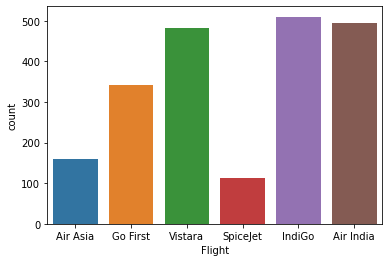

In [6]:
ax=sns.countplot(df['Flight'])
print(df['Flight'].value_counts())

There is not much difference between Indigo , Air India, Vistara and Go First, and there is not much diffrence between Air Asis and SpiceJet but they are few.

1 Stop       1871
 Non Stop     145
2 Stop(s)      84
Name: Stops, dtype: int64


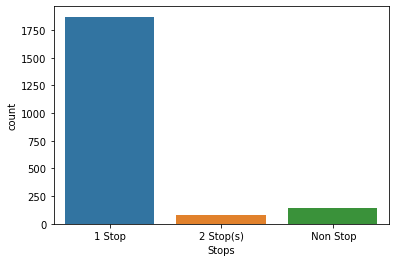

In [8]:
ax=sns.countplot(df['Stops'])
print(df['Stops'].value_counts())

Flights having 1 stops are more.

##   Label Encoding to convert object column into numerical column for further analysis

In [11]:

from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i])

## visualization of data through distribution plot

<AxesSubplot:xlabel='Departure', ylabel='Density'>

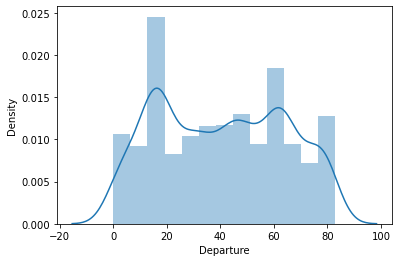

In [13]:
sns.distplot(df['Departure'])

Departure column is looking somehow normal means there is not much difference between departure timing of the flight.

<AxesSubplot:xlabel='Arrival', ylabel='Density'>

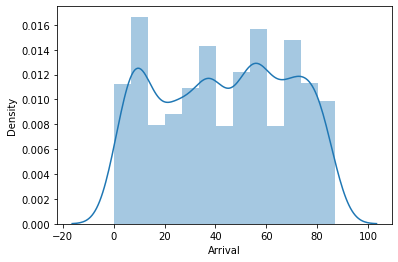

In [14]:
sns.distplot(df['Arrival'])

Arrival timing of the flight is showing not much diffrence and looking normally distributed.

<AxesSubplot:xlabel='duration', ylabel='Density'>

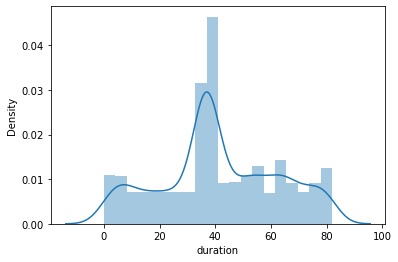

In [15]:
sns.distplot(df['duration'])

distribution plot is showing that every flights are showing the different time duration.

<AxesSubplot:xlabel='Price', ylabel='Density'>

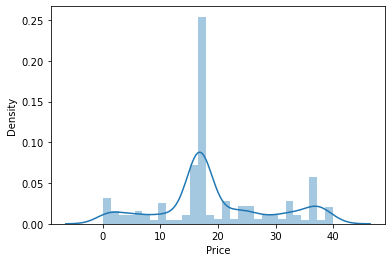

In [16]:
sns.distplot(df['Price'])

Price is varrying starting from rupees 5000 approx(that i found in analysis)

## Checking Outliers

Flight              AxesSubplot(0.125,0.657941;0.227941x0.222059)
Boarding City    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Destination      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Departure           AxesSubplot(0.125,0.391471;0.227941x0.222059)
Arrival          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
duration         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Stops                  AxesSubplot(0.125,0.125;0.227941x0.222059)
Price               AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

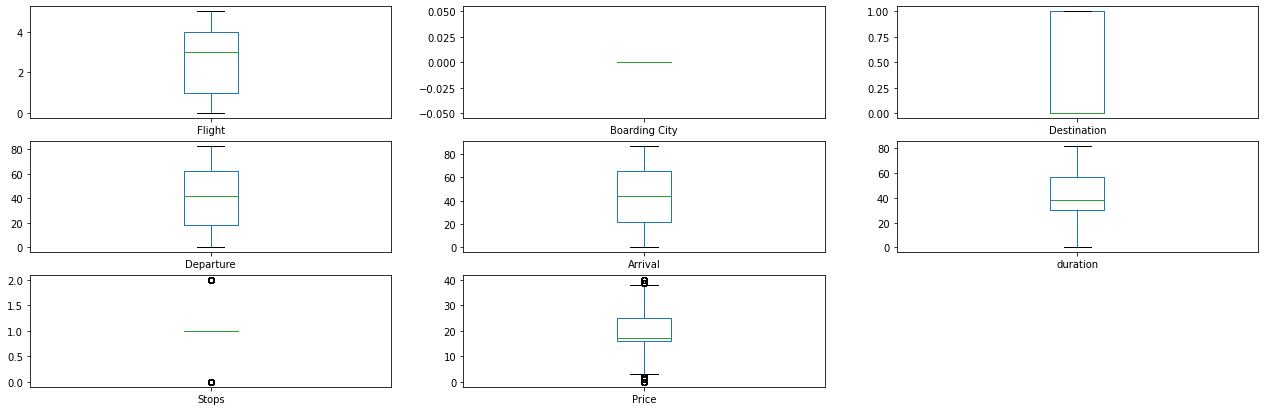

In [17]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(22,7))

Few outliers are presnt in Stops columns but I will not treat it and also outliers are Present in the target column Price, we cant treat outliers on Traget columns.

## Statistical Summary

In [18]:
df.describe()

,Flight,Boarding City,Destination,Departure,Arrival,duration,Stops,Price
count,2100.000000,2100.0,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,2.649048,0.0,0.491905,40.534762,43.322857,41.350952,0.970952,19.346190
std,1.624073,0.0,0.500054,23.625436,25.200001,21.031798,0.329022,9.857375
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.0,0.000000,18.000000,22.000000,30.000000,1.000000,16.000000
50%,3.000000,0.0,0.000000,42.000000,44.000000,38.000000,1.000000,17.000000
75%,4.000000,0.0,1.000000,62.000000,65.000000,57.000000,1.000000,25.000000
max,5.000000,0.0,1.000000,83.000000,87.000000,82.000000,2.000000,40.000000


Number of values are same in every column.

Not much difference between mean and median in any of the column.

Data is not much deviated.

Not much difference between 75% and max in any of the column.

## Splitting the Dataset

In [20]:
x=df.drop('Price',axis=1)
y=df['Price']

In [21]:
x.shape

(2100, 7)

In [22]:
y.shape

(2100,)

## Lets bring all features to a common scale

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df)

x=pd.DataFrame(x,columns=df.columns)

## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1680, 8)
(420, 8)
(1680,)
(420,)


## Model Building

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [33]:
# for linear Regreesion
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)

print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 1.0
error
mean absolute error 8.51805398702882e-15
mean squared error 1.0824674211832703e-28
root mean squared error 1.0404169458362691e-14


In [34]:
# cross validation Linear Regression
score=cross_val_score(lr,x,y,cv=10)
print('cv score',np.mean(score))

cv score 1.0


Both r2 score and cv score is 100%.

In [35]:
# for Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.9896507987856674
error
mean absolute error 0.7716643245023824
mean squared error 1.0077197922734296
root mean squared error 1.00385247535354


In [36]:
# cross validation Lasso
score=cross_val_score(ls,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.989531075441511


Both r2 score and cv score is 98%.

In [39]:
# for Ridge
rd=Ridge()
rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.9999996133335763
error
mean absolute error 0.004704199082138801
mean squared error 3.7650384801730695e-05
root mean squared error 0.006135990938856632


In [40]:
# Cross validation Ridge
score=cross_val_score(rd,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9999996776927356


r2 score is 99% and cv score is 99%.

In [41]:
# for elasticnet
en=ElasticNet()
en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.8675862507418696
error
mean absolute error 2.7792173447488633
mean squared error 12.89335796387398
root mean squared error 3.590732232271571


In [42]:
# cross validation score
score=cross_val_score(en,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.8643330730037695


Both r2 score and cv score is 86%.

## Hyper Parameter Tuning RandomForest Regreesor

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log'],'max_depth':[0,5]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto'}


In [45]:
rf=RandomForestRegressor(criterion='mse',max_features='auto',max_depth=5)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_y=rf.predict(x_test)

rfs=r2_score(y_test,pred_y)
print('r2 score',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cv score',rfc*100)

r2 score 99.96922109940547
cv score 99.96708725481447


## Hyper Parameter Tuning For Lasso

In [47]:
clf = ls
parameters={'fit_intercept':['bool']}
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'fit_intercept': 'bool'}


In [48]:

ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)

lfs=r2_score(y_test,pred_decision)
print('r2 score:', lfs*100)

lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('cross val score:',lsc*100)

r2 score: 98.96507987856674
cross val score: 98.96951672769555


## Conclusion

## saving the model

In [50]:
import pickle
filename='airlines_price_pred.pkl'
pickle.dump(ls,open(filename,'wb'))

In [52]:
loaded_model=pickle.load(open('airlines_price_pred.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9896507987856674


In [53]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
predicted,37.013812,16.350433,17.24884,21.740879,17.24884,16.350433,16.350433,5.569539,32.521773,27.131326,...,1.975907,2.874315,10.959986,7.366354,17.24884,17.24884,3.772723,16.350433,35.216997,35.216997
original,37.013812,16.350433,17.24884,21.740879,17.24884,16.350433,16.350433,5.569539,32.521773,27.131326,...,1.975907,2.874315,10.959986,7.366354,17.24884,17.24884,3.772723,16.350433,35.216997,35.216997
